<a href="https://colab.research.google.com/github/divyansh1195/Deep-Learning/blob/master/ANN%20Churn_Modelling%20Classification/ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN Churn Modeling to predict whether a customer would leave bank or not

In [1]:
#GPU SpecSheet
!nvidia-smi

Fri Sep 11 10:55:05 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing the libraries and the dataset

In [2]:
# Importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
exited_count = len(dataset.loc[dataset['Exited'] == 1])
stayed_count=len(dataset.loc[dataset['Exited']==0])
(exited_count, stayed_count)

(2037, 7963)

In [5]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

#### Encoding Categorical Variables - Geography and Gender

Geography

In [8]:
#first we consider Geography feature 
X.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
geography_map={"France": 1, "Spain": 2, "Germany": 3}
X['Geography']=X['Geography'].map(geography_map)

Gender

In [10]:
#first we consider Geography feature 
X.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
gender_map={"Female": 1, "Male": 2}
X['Gender']=X['Gender'].map(gender_map)

In [12]:
X.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,1,42,2,0.00,1,1,1,101348.88
1,608,2,1,41,1,83807.86,1,0,1,112542.58
2,502,1,1,42,8,159660.80,3,1,0,113931.57
3,699,1,1,39,1,0.00,2,0,0,93826.63
4,850,2,1,43,2,125510.82,1,1,1,79084.10
5,645,2,2,44,8,113755.78,2,1,0,149756.71
6,822,1,2,50,7,0.00,2,1,1,10062.80
7,376,3,1,29,4,115046.74,4,1,0,119346.88
8,501,1,2,44,4,142051.07,2,0,1,74940.50
9,684,1,2,27,2,134603.88,1,1,1,71725.73


In [13]:
X=X.values
y=y.values

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN Model

In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout#regularization parameter to avoid overfitting for Deep Neural Network

In [16]:
# Initialising the ANN
classifier = Sequential()#empty neural network initialized

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 10))
#input_dim is the input features based on the number of columns, units=6 is the number of hidden neurons in hidden layer 1

In [18]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
#relu and leaky relu prevent vanishing gradient problem

In [19]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [20]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#binary_crossentropy for binary output, optimizer='adam' is the most popular one

In [21]:
# Fitting the ANN to the Training set
ann=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5255 - accuracy: 0.7936 - val_loss: 0.4995 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4716 - accuracy: 0.7988 - val_loss: 0.4684 - val_accuracy: 0.7997
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4464 - accuracy: 0.8035 - val_loss: 0.4534 - val_accuracy: 0.8061
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4338 - accuracy: 0.8074 - val_loss: 0.4443 - val_accuracy: 0.8050
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4258 - accuracy: 0.8112 - val_loss: 0.4395 - val_accuracy: 0.8088
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4206 - accuracy: 0.8151 - val_loss: 0.4351 - val_accuracy: 0.8099
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4161 - accuracy: 0.8177 - val_loss: 0.4297 - val_accuracy: 0.8092

So, training accuracy was 0.8642 and my validation accuracy was 0.8523

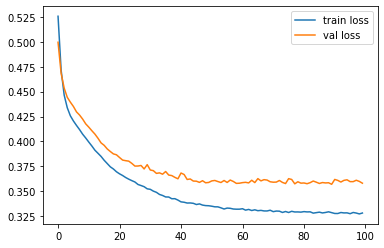

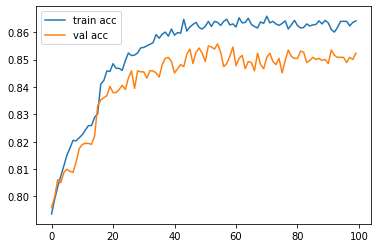

In [22]:
# Plot the Loss Function
plt.plot(ann.history['loss'], label='train loss')
plt.plot(ann.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Plot the Accuracy
plt.plot(ann.history['accuracy'], label='train acc')
plt.plot(ann.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Predicting the test set result and model evaluation

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('The Confusion Matrix is', cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('The accuracy_score is', score)

The Confusion Matrix is [[1526   69]
 [ 206  199]]
The accuracy_score is 0.8625


Training Accuracy, Validation Accuracy and Test Dataset Accuracy are almost same.